<a href="https://colab.research.google.com/github/apoorvaKR12695/face-emotion-detection-/blob/main/face_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the required Libraries
import pandas as pd
import numpy as np

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np 
import cv2
import os

# Removing Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/') # access the google drive files

Mounted at /content/drive/


In [3]:
# importing zip file from my google drive and extracted it here.
from zipfile import ZipFile
filename = '/content/drive/MyDrive/Face_emotion /archive.zip'

# extract it
with ZipFile(filename , 'r') as zip:
  zip.extractall()
  print('Zip file extracted successfully')

Zip file extracted successfully


In [4]:
#test and train data
test_data = '/content/test/'
train_data = '/content/train/'

In [5]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='Blues_r') 

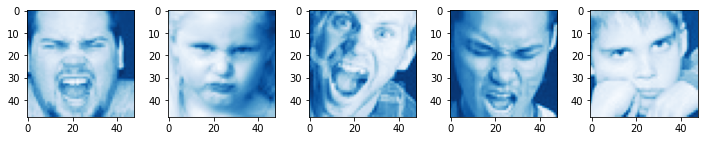

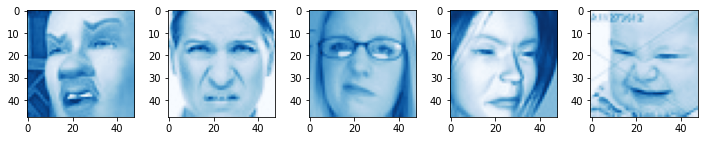

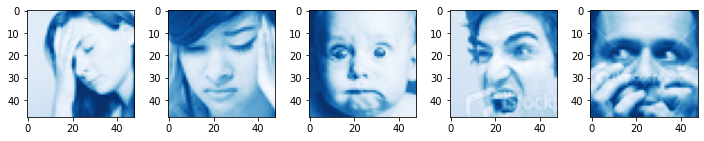

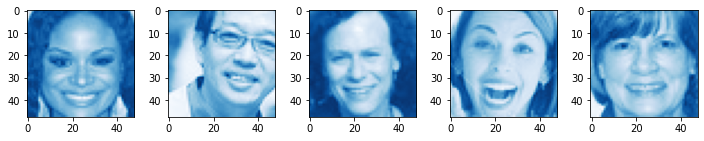

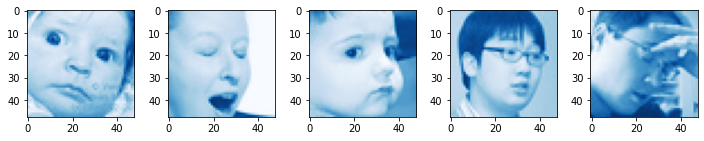

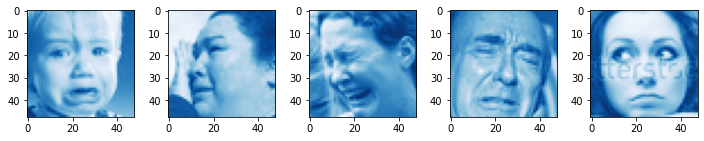

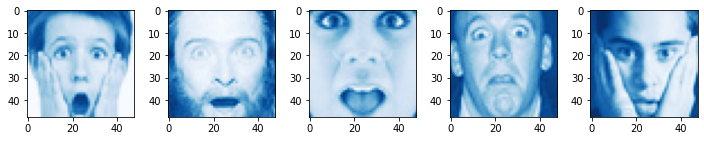

In [6]:
import os
import matplotlib.pyplot as plt
#angry class
plot_images(train_data+'/angry')
#disgust class
plot_images(train_data+'/disgust')
#fear class
plot_images(train_data+'/fear')
#happy class
plot_images(train_data+'/happy')
#neutral class
plot_images(train_data+'/neutral')
#sad class
plot_images(train_data+'/sad')
#surprise class
plot_images(train_data+'/surprise')

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)
# Creating  Training Dataset
train_gen=training_gen.flow_from_directory(train_data,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set
test_gen=testing_gen.flow_from_directory(test_data,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

model = Sequential()


model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
  
  

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer =  tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

# this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')



# to save model weights to my drive loaction
weight_checkpoint_path = '/content/drive/MyDrive/face_emotion/cnn_model1.h5'

checkpoint = ModelCheckpoint(weight_checkpoint_path, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]
 #fitting the model

results = model.fit_generator(generator=train_gen,
                              epochs=50,
                              validation_data = test_gen,
                              callbacks= callbacks
                                )



Epoch 1/50
898/898 [==============================] - ETA: 0s - loss: 5.2619 - accuracy: 0.2602
Epoch 1: saving model to /content/drive/MyDrive/face_emotion/cnn_model1.h5
898/898 [==============================] - 31s 21ms/step - loss: 5.2619 - accuracy: 0.2602 - val_loss: 5.2388 - val_accuracy: 0.3115 - lr: 0.0010
Epoch 2/50
897/898 [============================>.] - ETA: 0s - loss: 4.5620 - accuracy: 0.2673
Epoch 2: saving model to /content/drive/MyDrive/face_emotion/cnn_model1.h5
898/898 [==============================] - 19s 21ms/step - loss: 4.5606 - accuracy: 0.2674 - val_loss: 3.5453 - val_accuracy: 0.2474 - lr: 0.0010
Epoch 3/50
897/898 [============================>.] - ETA: 0s - loss: 3.6342 - accuracy: 0.2947
Epoch 3: saving model to /content/drive/MyDrive/face_emotion/cnn_model1.h5
898/898 [==============================] - 18s 20ms/step - loss: 3.6339 - accuracy: 0.2947 - val_loss: 3.5491 - val_accuracy: 0.2462 - lr: 0.0010
Epoch 4/50
896/898 [============================>

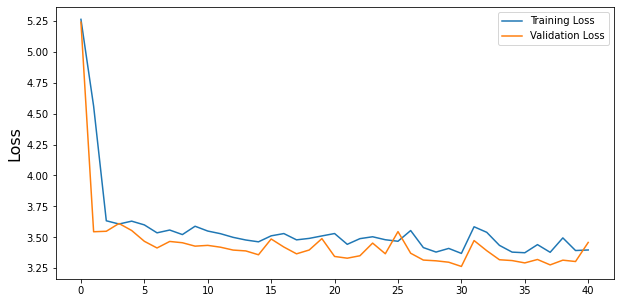

In [9]:
#Plotting Accuracy & Loss

plt.figure(figsize=(10,5))
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')




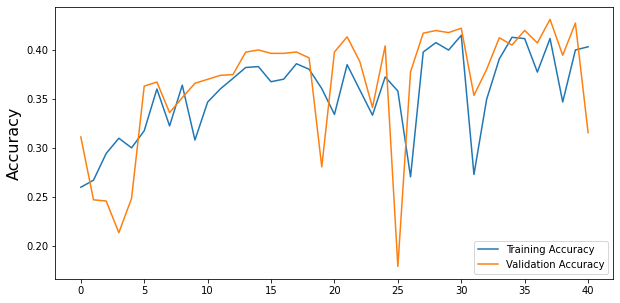

In [10]:
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm= confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                         
cm

array([[  58,    0,  417,  402,    6,   75,    0],
       [   4,    0,   56,   49,    0,    2,    0],
       [  16,    0,  581,  354,   13,   58,    2],
       [  15,    0,  406, 1263,   11,   79,    0],
       [  36,    0,  524,  567,   22,   83,    1],
       [  45,    0,  594,  470,   17,  121,    0],
       [  15,    0,  612,  164,    6,   12,   22]])

Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

       angry       0.31      0.06      0.10       958
     disgust       0.00      0.00      0.00       111
        fear       0.18      0.57      0.28      1024
       happy       0.39      0.71      0.50      1774
     neutral       0.29      0.02      0.03      1233
         sad       0.28      0.10      0.14      1247
    surprise       0.88      0.03      0.05       831

    accuracy                           0.29      7178
   macro avg       0.33      0.21      0.16      7178
weighted avg       0.36      0.29      0.21      7178



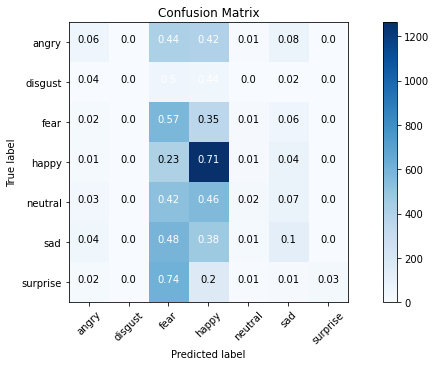

In [29]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_gen.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

In [30]:
 from sklearn.metrics import accuracy_score

 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc 

0.28796322095291166

In [31]:
 
epochs = 100

In [32]:
num_labels = 7
model = Sequential()  
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1), padding='same'))  
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu', padding='same'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.3))  
#2nd convolution layer  
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.3))  
#3rd convolution layer  
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.3))
#3rd CNN layer
model.add(Conv2D(512,(3,3),activation='relu',padding = 'same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.3))

model.add(Flatten())  
model.add(Dense(num_labels, activation='softmax'))  
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)       

In [33]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/MyDrive/face_emotion/cnn_model2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

 #fitting the model
results = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=epochs,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100
897/897 [==============================] - 57s 62ms/step - loss: 2.1988 - accuracy: 0.2895 - val_loss: 1.7518 - val_accuracy: 0.3516 - lr: 0.0010
Epoch 2/100
897/897 [==============================] - 55s 62ms/step - loss: 1.6013 - accuracy: 0.4083 - val_loss: 1.5285 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 3/100
897/897 [==============================] - 55s 62ms/step - loss: 1.3989 - accuracy: 0.4809 - val_loss: 1.3550 - val_accuracy: 0.4735 - lr: 0.0010
Epoch 4/100
897/897 [==============================] - 56s 62ms/step - loss: 1.2989 - accuracy: 0.5139 - val_loss: 1.3523 - val_accuracy: 0.4817 - lr: 0.0010
Epoch 5/100
897/897 [==============================] - 57s 63ms/step - loss: 1.2239 - accuracy: 0.5435 - val_loss: 1.3283 - val_accuracy: 0.5106 - lr: 0.0010
Epoch 6/100
897/897 [==============================] - 55s 62ms/step - loss: 1.1527 - accuracy: 0.5674 - val_loss: 1.5174 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 7/100
897/897 [==============================]

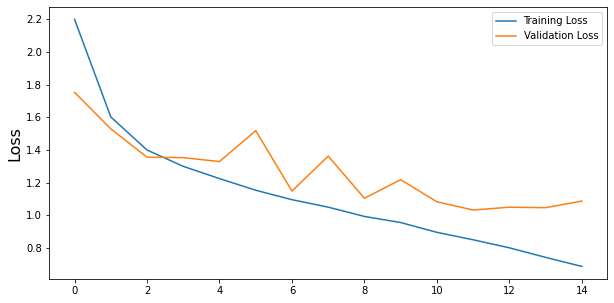

In [34]:
#Plotting Accuracy & Loss

plt.figure(figsize=(10,5))
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')




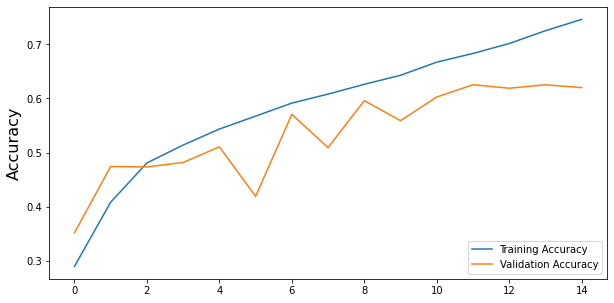

In [35]:
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                         
cm

array([[ 570,    4,   83,   60,  107,  124,   10],
       [  43,   42,    8,    8,    2,    7,    1],
       [ 123,    1,  419,   72,  139,  197,   73],
       [  47,    0,   34, 1540,   92,   38,   23],
       [ 115,    1,   43,  126,  756,  180,   12],
       [ 155,    0,  123,  105,  257,  596,   11],
       [  30,    2,  108,   71,   37,   16,  567]])

Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

       angry       0.53      0.59      0.56       958
     disgust       0.84      0.38      0.52       111
        fear       0.51      0.41      0.45      1024
       happy       0.78      0.87      0.82      1774
     neutral       0.54      0.61      0.58      1233
         sad       0.51      0.48      0.50      1247
    surprise       0.81      0.68      0.74       831

    accuracy                           0.63      7178
   macro avg       0.65      0.57      0.60      7178
weighted avg       0.63      0.63      0.62      7178



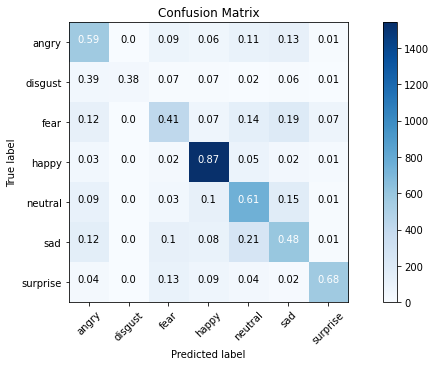

In [37]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_gen.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

In [38]:
 from sklearn.metrics import accuracy_score

 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc 

0.625522429646141

In [39]:
# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)

In [40]:
# Creating  Training Dataset
train_gen=training_gen.flow_from_directory(train_data,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set
test_gen=testing_gen.flow_from_directory(test_data,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [42]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

#2nd CNN layer
model.add(Conv2D(128,(5,5),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.3))

#3rd CNN layer
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

# Fully connected layer 
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/MyDrive/face_emotion/cnn_model3.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

 #fitting the model

results = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks_list
                                )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_9 (Batc  (None, 24, 24, 128)     

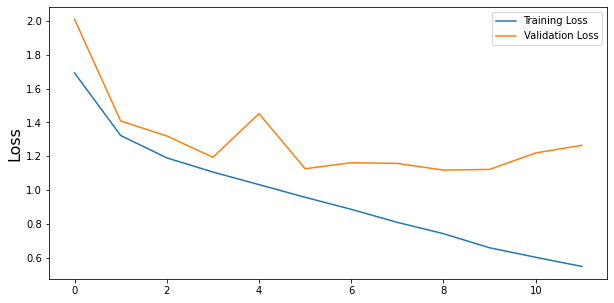

In [43]:
#Plotting Accuracy & Loss

plt.figure(figsize=(10,5))
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')




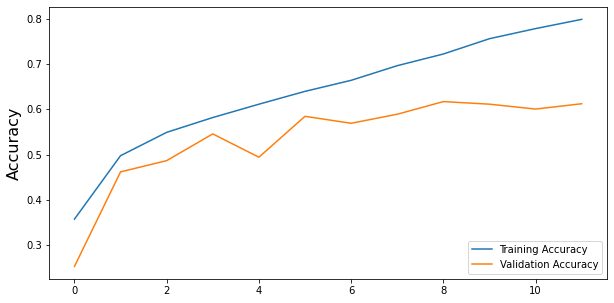

In [44]:
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                         
cm

array([[ 520,    8,   43,   71,  114,  183,   19],
       [  27,   60,    2,    7,    2,   10,    3],
       [ 116,    5,  297,   81,  140,  275,  110],
       [  39,    0,   19, 1495,   83,  105,   33],
       [  98,    2,   32,  123,  718,  251,    9],
       [ 146,    2,   69,  104,  202,  712,   12],
       [  25,    0,   36,   47,   54,   41,  628]])

In [46]:
 from sklearn.metrics import accuracy_score

 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc 

0.6171635553078852

Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

       angry       0.54      0.54      0.54       958
     disgust       0.78      0.54      0.64       111
        fear       0.60      0.29      0.39      1024
       happy       0.78      0.84      0.81      1774
     neutral       0.55      0.58      0.56      1233
         sad       0.45      0.57      0.50      1247
    surprise       0.77      0.76      0.76       831

    accuracy                           0.62      7178
   macro avg       0.64      0.59      0.60      7178
weighted avg       0.62      0.62      0.61      7178



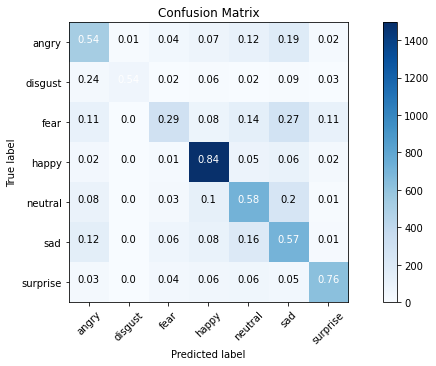

In [47]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_gen.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

In [54]:
from keras.preprocessing.image import ImageDataGenerator
#test and train data
test_data = '/content/test/'
train_data = '/content/train/'

dim = 128


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_data,
    target_size = (dim, dim),
    batch_size=8
)

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()
model.compile(optimizer=Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        36928     
                                   

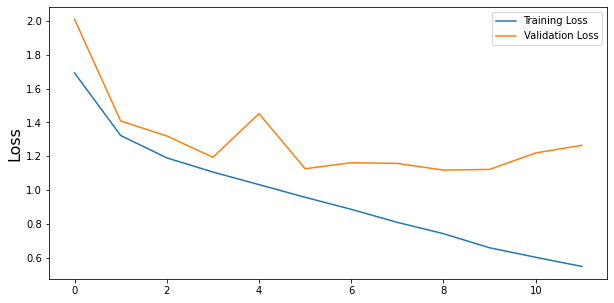

In [55]:
#Plotting Accuracy & Loss

plt.figure(figsize=(10,5))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')




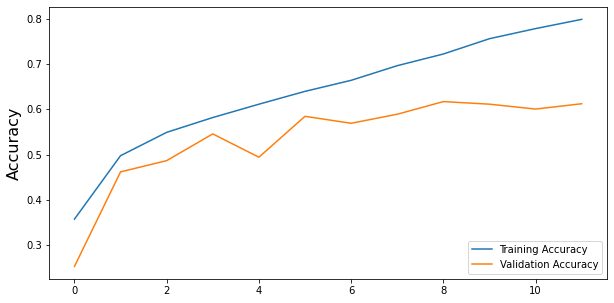

In [56]:
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting For Test Set
predictions=model.predict(validation_generator)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=validation_generator.classes)                         
cm

InvalidArgumentError: ignored

In [58]:
 from sklearn.metrics import accuracy_score

 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc 

0.6171635553078852

In [59]:
# resnet is trained on rgb photos and we have grascaled images so converting colour mode to rgb
datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)

In [60]:
# size of image and batchs

dim = 48         
batch_size = 32       
 

train_generator = datagen_train.flow_from_directory(train_data,
                                                  target_size=(dim,dim),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

validation_generator = datagen_train.flow_from_directory(test_data,
                                                  target_size=(dim,dim),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [62]:
#using pretrained model, RESNET50 architecture
from tensorflow.keras.applications.resnet50 import ResNet50

In [63]:
# creating a base model using resnet 
# and loading the pretrained weights 
base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                          

In [64]:
# making all the layers except last 4 layers non trainable 
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
# Build model on the top of base model

epochs=50
batch_size = 32 


model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

#Fully connected 1st layer
model.add(Dense(512,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Fully connected layer 2nd layer
model.add(Dense(256,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#output layer
model.add(Dense(7, activation='softmax'))


# Final model summary
model.summary()


# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


steps_per_epoch=train_generator.n//train_generator.batch_size

validation_steps=validation_generator.n//validation_generator.batch_size


# this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')



# to save model weights to my drive loaction
weight_checkpoint_path = '/content/drive/MyDrive/face_emotion/resnet.h5'

checkpoint = ModelCheckpoint(weight_checkpoint_path, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]


# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_16 (Dropout)        (None, 2, 2, 2048)        0         
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_13 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 512)               4194816   
                                                                 
 batch_normalization_14 (Bat  (None, 512)              2048      
 chNormalization)                                     

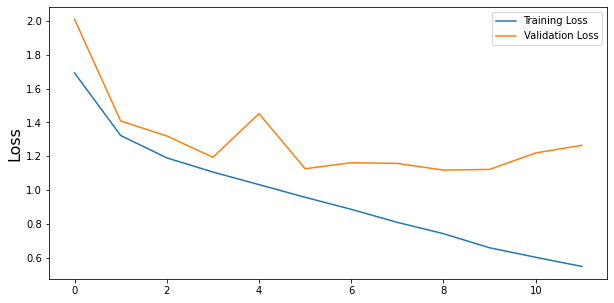

In [69]:
#Plotting Accuracy & Loss

plt.figure(figsize=(10,5))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')




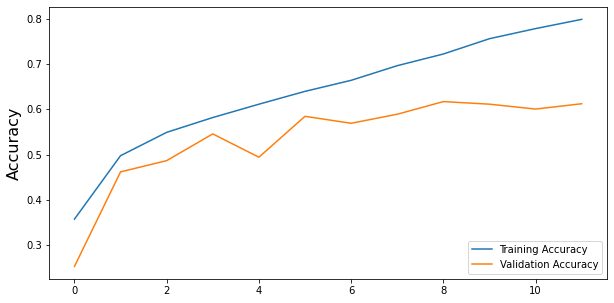

In [70]:
plt.figure(figsize=(10,5))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting For Test Set
predictions=model.predict(validation_generator)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=validation_generator.classes)                         
cm

array([[ 155,    4,   56,  469,  115,  134,   25],
       [   8,    8,    3,   59,   12,   18,    3],
       [  58,    6,  120,  457,  120,  183,   80],
       [  36,    5,   33, 1502,   77,   93,   28],
       [  54,    7,   38,  565,  380,  165,   24],
       [  74,    6,   59,  576,  145,  361,   26],
       [  23,    2,   67,  255,   72,   49,  363]])